In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sympy as sy

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
df = pd.read_csv('airline_passanger_satisfaction.csv')

In [23]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [64]:
df_satis= df[df['satisfaction']=='satisfied']
df_disnet= df[df['satisfaction']=='neutral or dissatisfied']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [56]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

 #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='#006699')
    plt.title(f'Histogram of {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Outliers in Data

Age


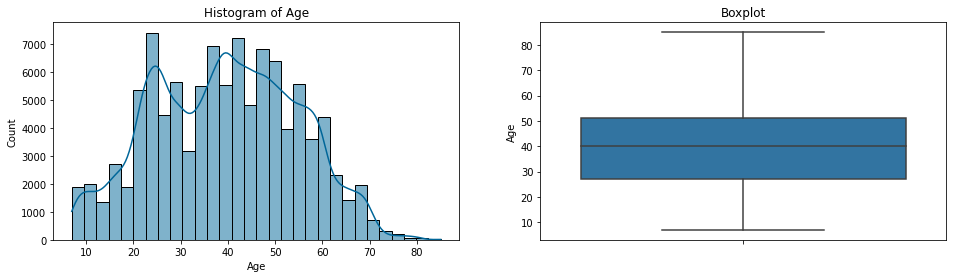

Flight Distance


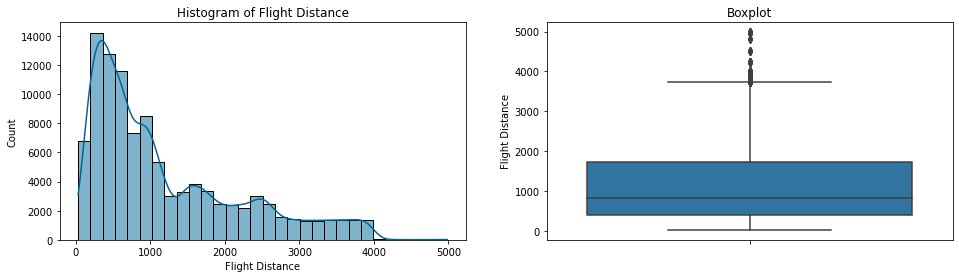

Departure Delay in Minutes


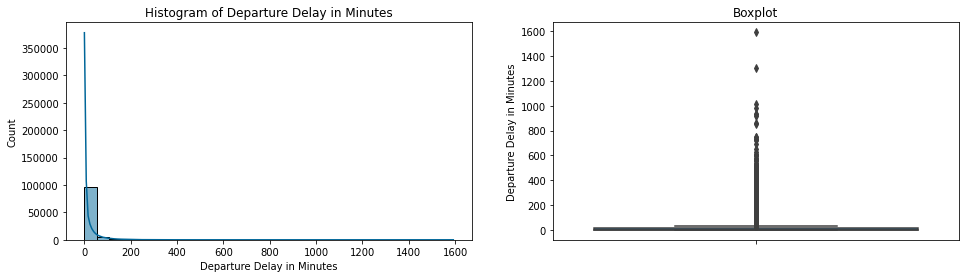

In [57]:
print('Age')
diagnostic_plots(df, 'Age')

print('Flight Distance')
diagnostic_plots(df, 'Flight Distance')

print('Departure Delay in Minutes')
diagnostic_plots(df, 'Departure Delay in Minutes')

Berdasarkan analisa pada gambar:
1. Pada kolom Age tidak ada outlier dan memiliki distribusi normal
2. Pada kolom Flight Distance memiliki outlier dan memiliki distribusi skew
3. Pada kolom Departure Delay in Minutes memiliki outlier dan memiliki distribusi skew

### Missing Values

In [26]:
print("Total Missing Value on the dataset: " , df.isnull().sum().sum())

pd.DataFrame({'missing value' : df.isnull().sum()})

Total Missing Value on the dataset:  310


,missing value
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [47]:
# buat liat data mana aja yg missval

df_missval= df[df['Arrival Delay in Minutes'].isna()]
df_missval

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


In [27]:
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [28]:
df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [29]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

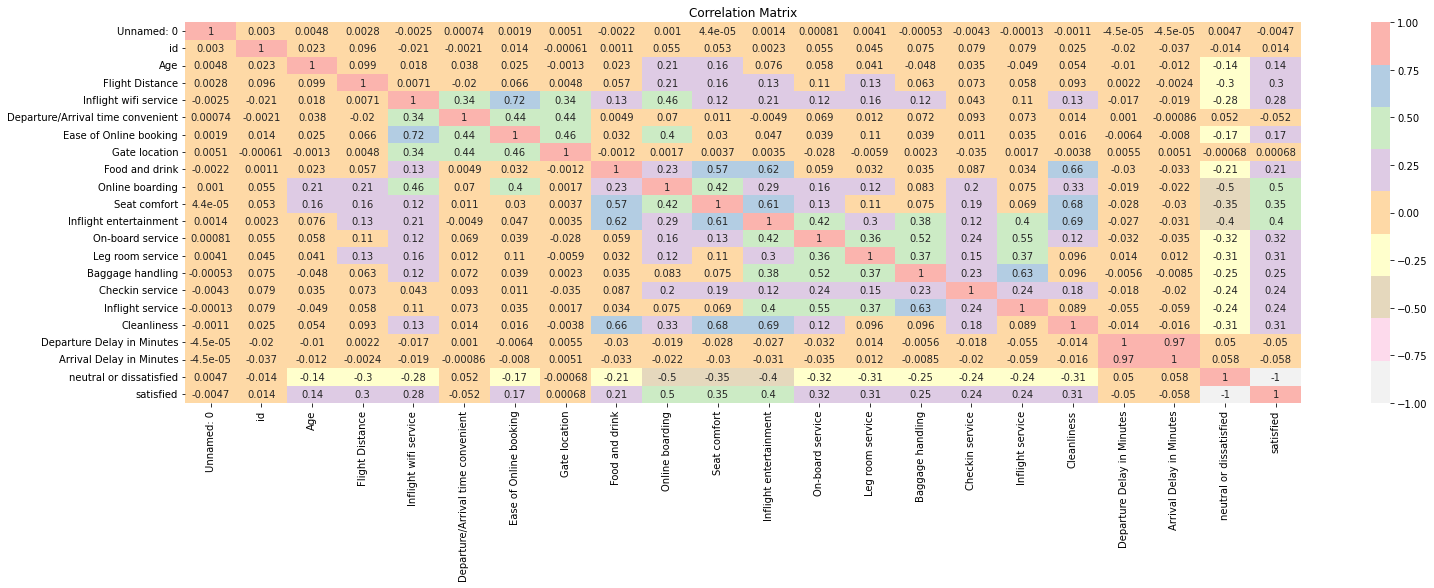

In [30]:
plt.figure(figsize=(25, 7))
sns.heatmap(pd.concat([df, pd.get_dummies(df.satisfaction)], axis=1).corr(), annot=True, cmap='Pastel1_r')
plt.title('Correlation Matrix')

In [31]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [32]:
df['Age'].value_counts()

39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64

In [33]:
df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

## **Data Visualitation**

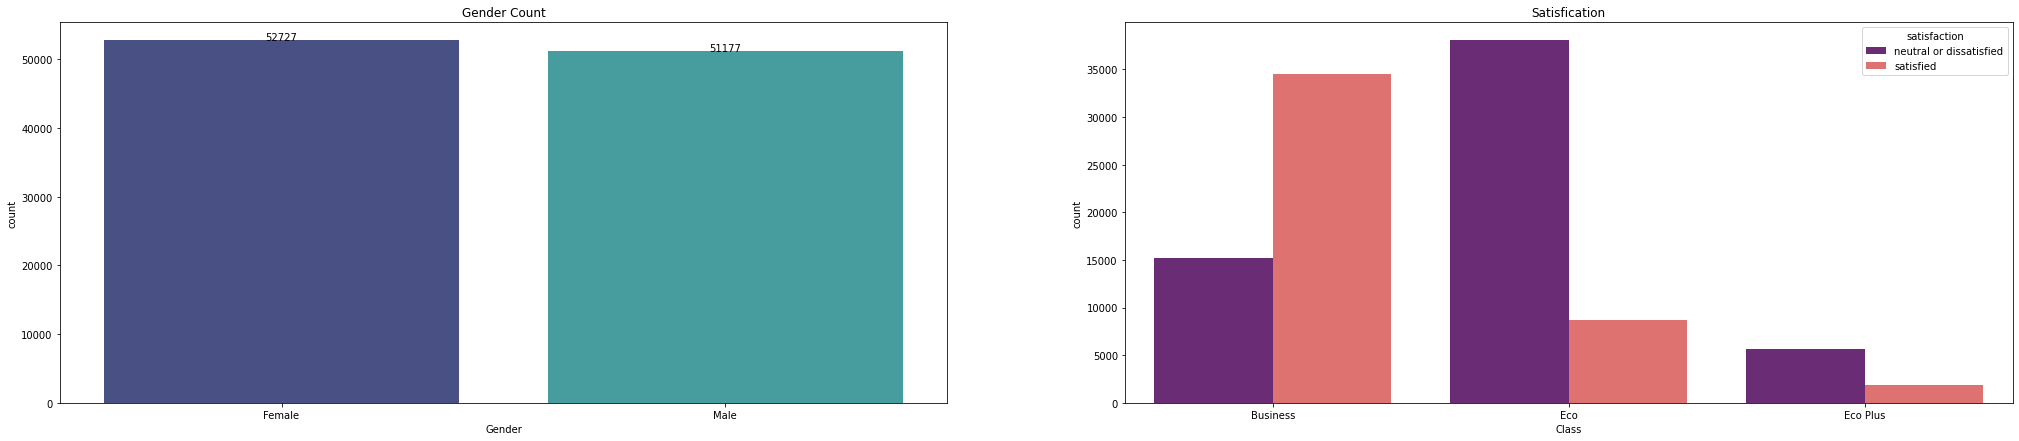

In [34]:
plt.figure(figsize=(35, 7))
plt.subplot(1, 2, 1)

fig = sns.countplot(x='Gender', data=df, order=df.Gender.value_counts().index, palette='mako')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('Gender Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Class', data=df, order=df.Class.value_counts().index, palette='magma', hue='satisfaction')
plt.title('Satisfication')
plt.xlabel('Class')


plt.show()

Pada grafik Satisfaction dapat dilihat pada kelas bisnis memiliki tingkat kepuasan yang tinggi dibanding kelas-kelas lainnya. Sedangkan pada kelas Eco memiliki tingkat ketidakpuasan atau netral yg paling tinggi.  

Text(0.5, 0, 'Gender')

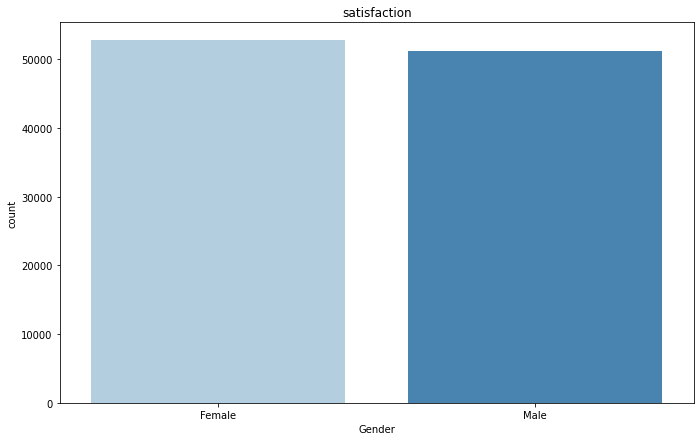

In [35]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df, order=df.Gender.value_counts().index, palette='Blues')
plt.title('satisfaction')
plt.xlabel('Gender')
#plt.ylabel('Count')


c:\Users\rezal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender VS Type of Travel')

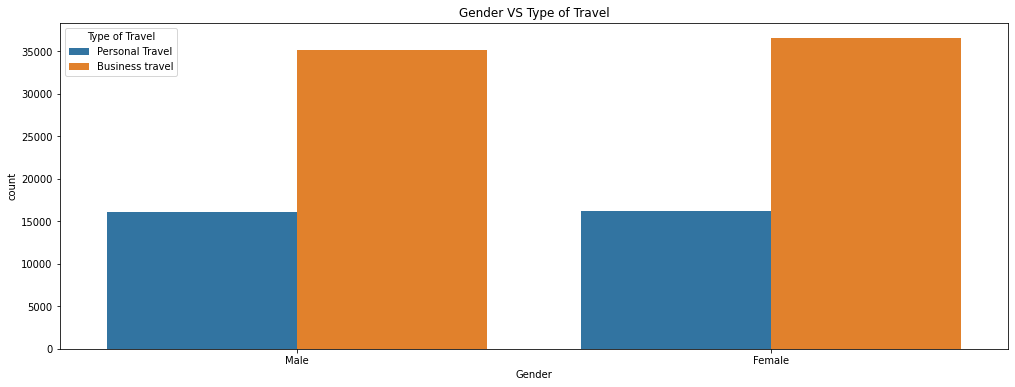

In [36]:
plt.figure(figsize = (17, 6))
sns.countplot('Gender', hue = 'Type of Travel', data = df)

plt.title('Gender VS Type of Travel')

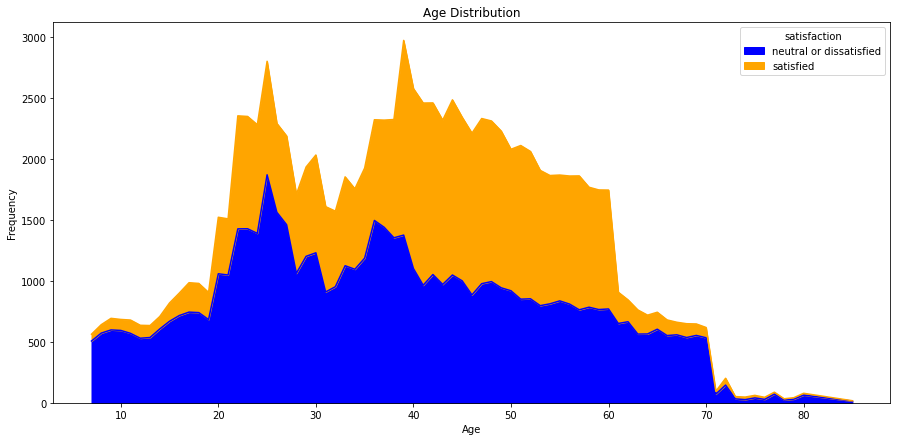

In [37]:
pd.crosstab(df.Age,df.satisfaction).plot(kind="area",figsize=(15,7),color=['blue','orange' ])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Banyak penumpang dengan rentang umur 25 - 60 merasa puas dengan pelayanan yg diberikan oleh maskapai. 

Text(0, 0.5, 'Tot flight distance')

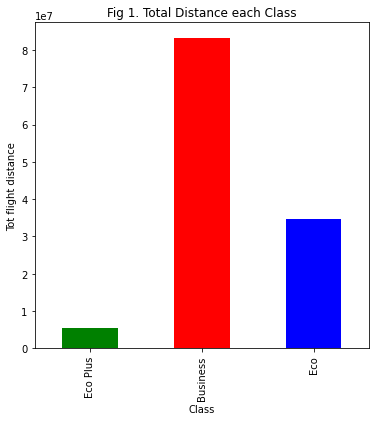

In [38]:
df.groupby("Class", sort=False)["Flight Distance"].sum().round(2).plot(kind='bar', figsize=(6, 6), width=0.5, color=['green','red','blue'])
plt.xlabel('Class')
plt.title('Fig 1. Total Distance each Class')
plt.ylabel('Tot flight distance')

Kelas bisnis melakukan perjalanan paling jauh

- Berdasarklan dari beberapa visualisasi data di atas dapat dilihat bahwa penerbangan dengan kelas bisnis memiliki tingkat kepuasan yang paling tinggi, itu bisa dimungkinkan pada kelas ini memiliki fasilitas yang paling bagus diantara kelas lainnya dan layanan yang maksimnal. dan berdasarkan data jarak penerbangan kelas bisnis juga memiliki jareak paling jauh, sehingga pihak maskapai bisa mengambil keuntungan dari kelas ini, namun disisi lain maskapai harus memperbaiki fasilitas dan layanan di kelas eco karna memiliki penilaian ketidakpuasan dan netral yang paling tinggi. 

## Hipotesis testing

Two tail, Two sample independent.

H0 : Rata - rata jarak penerbangan eco = rata rata jarak penerbangan eco plus

H1 : Rata - rata jarak penerbangan eco != rata rata jarak penerbangan eco plus

In [70]:
eco_plus = df['Flight Distance'][(df.Class == 'Eco Plus')]
eco = df['Flight Distance'][(df.Class == 'Eco')]


print('Rata-rata Flight Distance Eco Plus Automatic \n', eco_plus.mean(), '\n')
print('Rata-rata Flight Distance Eco Automatic \n', eco.mean(), '\n')

Rata-rata Flight Distance Eco Plus Automatic 
 747.1255671203629 

Rata-rata Flight Distance Eco Automatic 
 743.4397475665846 



In [71]:
t_stat, p_val = stats.ttest_ind(eco, eco_plus)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.5926883704543713
t-statistics: -0.5349474764709052


Karena P-value 0.5926883704543713 dimana lebih besar dari pada Critical Value 0.05 maka H0 diterima sehingga rata-rata jarak penerbangan kelas eco = kelas eco plus